In [2]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#reading the dataset from the given url
data=pd.read_csv('http://bit.ly/w-data')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE9A545D90>,
      dtype=object)

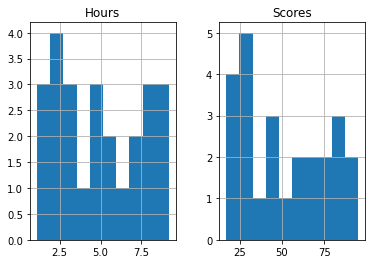

In [6]:
data.hist()

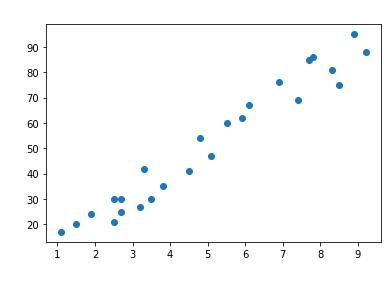

In [7]:
#Scores based on the number of hours studied
x=data.Hours
y=data.Scores
plt.title('Hours vs Scores',color='white',size=15)
plt.xlabel('Hours Studied',color='white',size=15)
plt.ylabel('Score',color='white',size=15)
plt.scatter(x,y)
plt.show()

In [8]:
#number of hours
X=data.iloc[:,:-1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [9]:
#scores
y=data.iloc[:,1].values
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [10]:
#80 20 split for test train set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
#impport linear regression model from sklearn
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [12]:
%%time
linreg.fit(X_train,y_train) 

Wall time: 449 ms


LinearRegression()

In [13]:
m=linreg.coef_
c=linreg.intercept_
print(m,c)

[9.91065648] 2.018160041434683


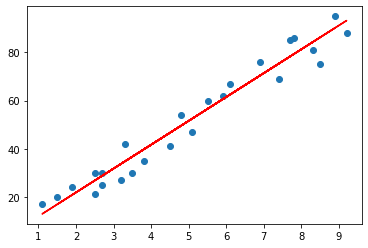

In [14]:
line=m*X + c
plt.scatter(X,y)
plt.plot(X,line,color='red')
plt.show()

In [15]:
%%time
yhat=linreg.predict(X_test)

Wall time: 0 ns


In [18]:
acc=linreg.score(X,y)
print("Accuracy is : {}%".format(acc*100))

Accuracy is : 95.26947647057274%


In [19]:
df=pd.DataFrame({'Actual':y_test,'Predicted':yhat})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
hours = 9.25
own_pred = linreg.predict(np.array([[hours]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [21]:
predcheck=m*9.25 + c
print(predcheck)

[93.69173249]


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, yhat)) 

Mean Absolute Error: 4.183859899002975


In [24]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test, yhat))



Mean Squared Error: 21.5987693072174


In [27]:
print('Root Mean Absolute Error:',np.sqrt(metrics.mean_squared_error(y_test, yhat)))

Root Mean Absolute Error: 4.6474476121003665
